In [24]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()

countries = ['HKG','SGP','TWN','JPN','KOR','CHN','THA','VNM','KHM','LAO','PHL','IDN','IND']

df = pd.read_stata('pwt91.dta')

df = df[df['countrycode'].isin(countries)]

df.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
2244,CHN,China,Yuan Renminbi,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2245,CHN,China,Yuan Renminbi,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2246,CHN,China,Yuan Renminbi,1952,622099.3125,619679.5625,577.607239,238.959076,NaN,1.110963,...,0.009002,-0.008517,0.054950,0.037037,0.192129,0.038141,0.132946,0.204909,0.194004,NaN
2247,CHN,China,Yuan Renminbi,1953,702971.3125,698787.5625,587.313965,244.866730,NaN,1.123135,...,0.007766,-0.007726,0.048923,0.039211,0.183917,0.039972,0.145368,0.213752,0.196268,NaN
2248,CHN,China,Yuan Renminbi,1954,646956.2500,639127.0625,597.903748,250.613724,NaN,1.135440,...,0.010569,-0.008955,0.047076,0.043738,0.196841,0.044273,0.157239,0.206467,0.200794,NaN


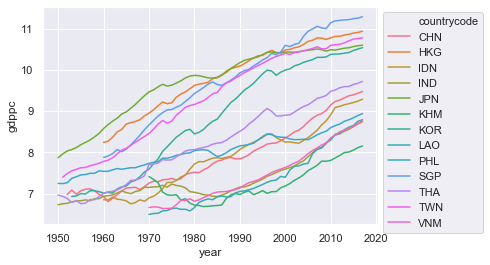

In [25]:
df['gdppc'] = np.log(df['rgdpe']/df['pop'])

sns.lineplot(x='year',y='gdppc',hue='countrycode',data=df)
plt.legend(loc='upper left',bbox_to_anchor=(1,1))

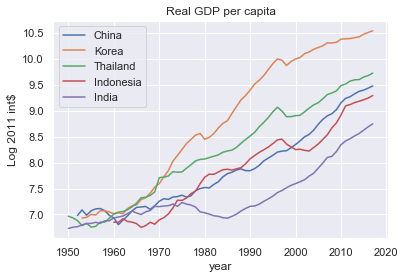

In [37]:
table = pd.pivot_table(df,index='year',columns='countrycode',values='gdppc')
table['CHN'].plot(label='China')
table['KOR'].plot(label='Korea')
table['THA'].plot(label='Thailand')
table['IDN'].plot(label='Indonesia')
table['IND'].plot(label='India')
plt.legend()
plt.title('Real GDP per capita')
plt.ylabel('Log 2011 int$')
plt.savefig('china_growth_comparison.png',dpi=200)

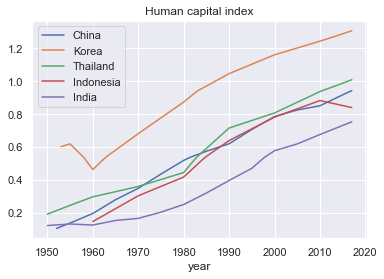

In [40]:
table1 = pd.pivot_table(df,index='year',columns='countrycode',values='hc')
table1 = np.log(table1)
table1['CHN'].plot(label='China')
table1['KOR'].plot(label='Korea')
table1['THA'].plot(label='Thailand')
table1['IDN'].plot(label='Indonesia')
table1['IND'].plot(label='India')
plt.legend()
plt.title('Human capital index')
plt.savefig('china_hc_comparison.png',dpi=200)